# Problem Statement - Predict loan paid or not using Random Forest

We want to classify and predict whether or not borrowers paid back their loan in full, using Random Forest algorithm. 

This project explores publicly available, lending club data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). This project aims to create a model to show profiles of borrowers with a high probability of paying back this loan.

The columns in the dataset represent the following:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase",     "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).



## What is Random Forest?



Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.

### How Random Forest algorithm works?

Steps involved in random forest algorithm:

- In Random forest n number of random records are taken from the data set having k number of records.

- Individual decision trees are constructed for each sample.

- Each decision tree will generate an output.

- Final output is considered based on Majority Voting or Averaging for Classification and regression respectively.

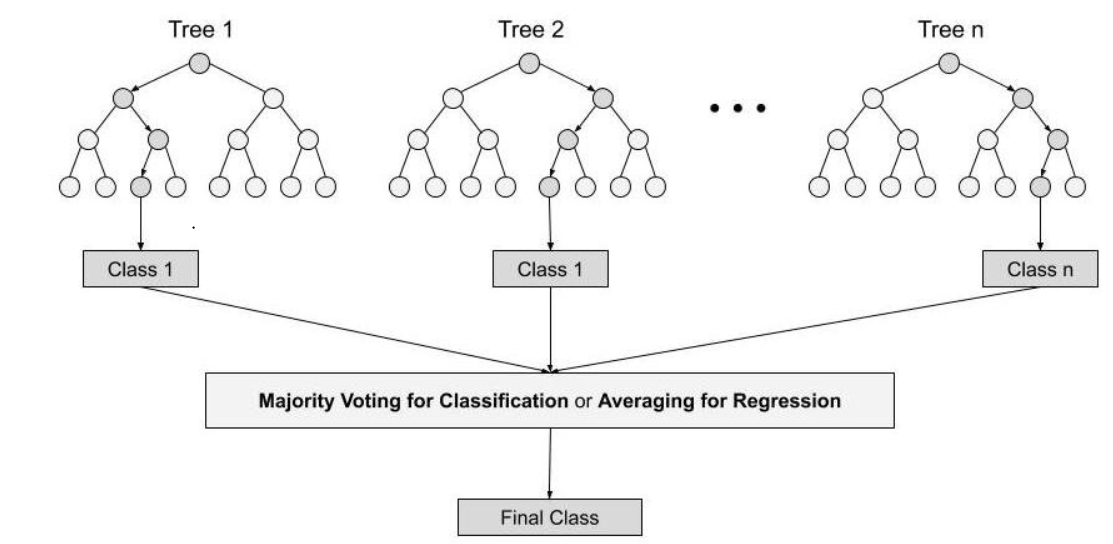

### Important Features of Random Forest

- Diversity- Not all attributes/variables/features are considered while making an individual tree, each tree is different.

- Immune to the curse of dimensionality- Since each tree does not consider all the features, the feature space is reduced.

- Parallelization-Each tree is created independently out of different data and attributes. This means that we can make full use of the CPU to build random forests.

- Train-Test split- In a random forest we don’t have to segregate the data for train and test as there will always be 30% of the data which is not seen by the decision tree.

- Stability- Stability arises because the result is based on majority voting/ averaging.

### Advantages and disadvantages of Random Forest algorithm

The advantages of Random forest algorithm are as follows:-

Random forest algorithm can be used to solve both classification and regression problems.
It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.
The disadvantages of Random Forest algorithm are listed below:-

The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.

#### Random Forests vs Decision Trees 

Some features of comparison are as follows:-

- Random forests is a set of multiple decision-trees.
- Decision-trees are computationally faster as compared to random forests.
- Deep decision-trees may suffer from overfitting. Random forest prevents overfitting by creating trees on random forests.
- Random forest is difficult to interpret. But, a decision-tree is easily interpretable and can be converted to rules.

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Data

In [2]:

df = pd.read_csv('loan_data.csv')
df.head(3)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


## 3. Exploratory Data Analysis

In [3]:
df.shape

(9578, 14)

There are 9578 rows and 14 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


There are 9578  records. Here not.fully.paid is the target variable and rest all are the predictor variables. 

'purpose' is the only categorical predictor as its of type='object'. 'credit.policy', 'fico], 'revol.bal', 'inq.last.6mths', 'delinq.2yrs','pub.rec' are of integer type and 'int.rate', 'installment', 'log.annual.inc', 'dti', 'days.with.cr.line' and 'revol.util' are floating point type.

There are no ordinal variables.

In [5]:
#prints the summary statistic of the numerical variables
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Interpret measures of central tendency:-

- mean - Mean represents the arithmetic average of the data(e.g - Mean Fico score is 710)
- median - Median represents the 50th percentile, or the middle value of the data, that separates the distribution into two halves(e.g - Median installment is 268.95)
- max - Max value for any feature(e.g - Maximum value for interest rate is 0.216400)
- std - Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean. A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa. 


In [6]:
#fetch the categorical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
#fetch the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['purpose'], dtype='object')

In [8]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [9]:
#typically if the numer of unique values are < 10 then the variable is likely to be a category otherwise continuou
df['pub.rec'].value_counts() 

0    9019
1     533
2      19
3       5
4       1
5       1
Name: pub.rec, dtype: int64

We will include 'pub.rec' in the list of categorical variables. And remove it from numerical columns.

In [10]:
df['purpose'].value_counts() 

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [11]:
categorical_cols = list(categorical_cols) + ['pub.rec']
categorical_cols

['purpose', 'pub.rec']

In [12]:
numerical_cols = numerical_cols.drop('pub.rec')
numerical_cols

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'not.fully.paid'],
      dtype='object')

### 3.a Univariate Analysis

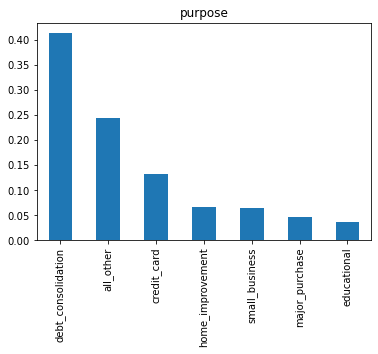

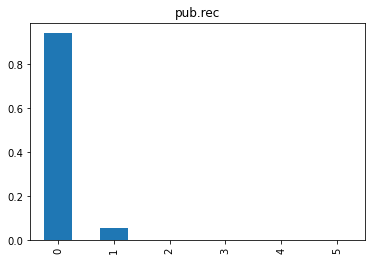

In [13]:
#the analysis is usually summarized in the form of count
#for categorical variables 
for c in categorical_cols:
    df[c].value_counts(normalize=True).plot(kind='bar', title = c)
    plt.show()
    

For 40% of the loans, purpose is debt_consolidation and less than 5% of borrowers have derogatory public records.

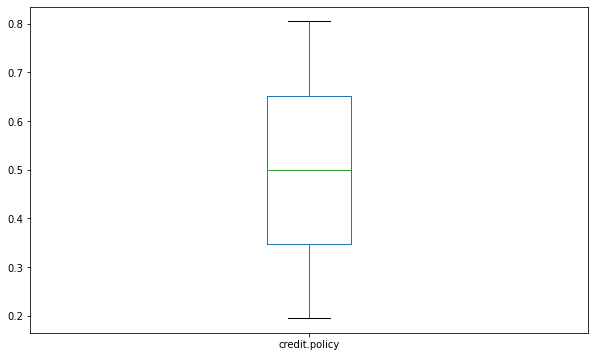

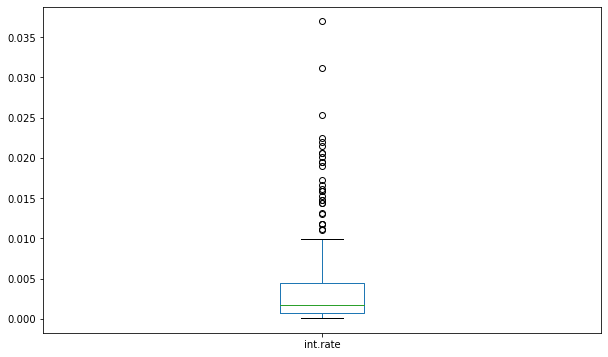

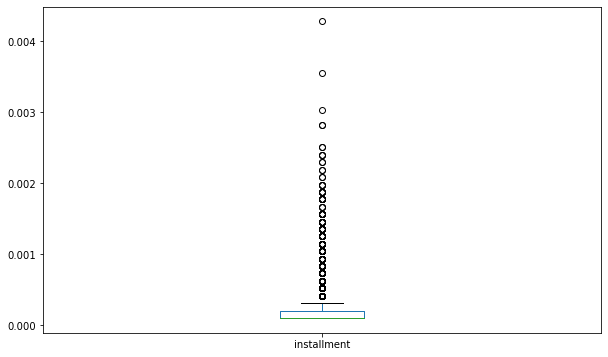

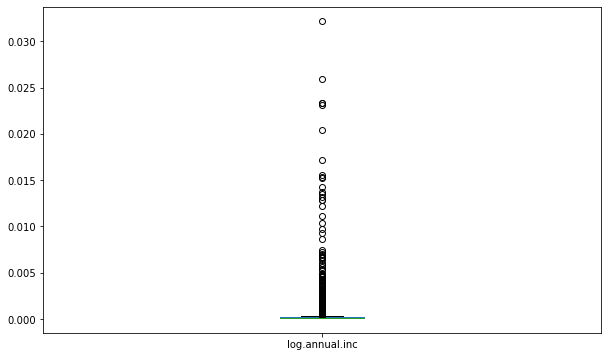

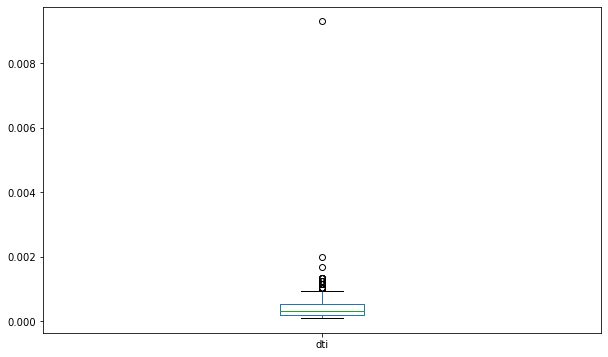

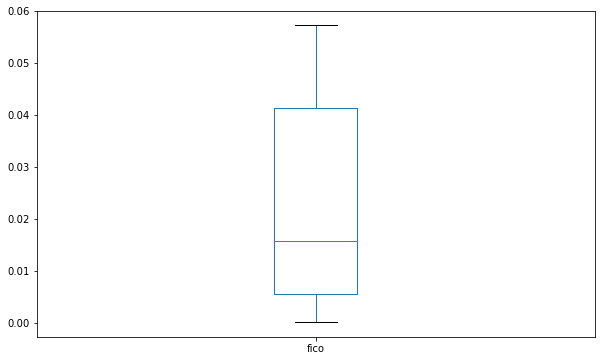

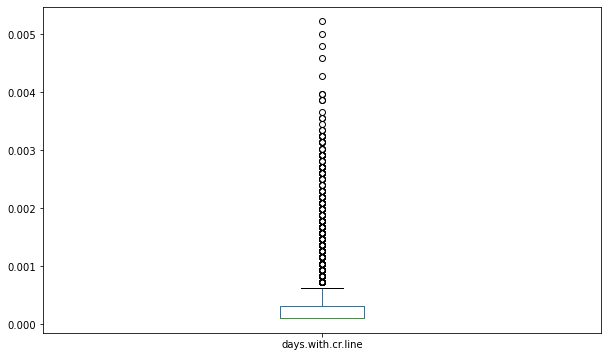

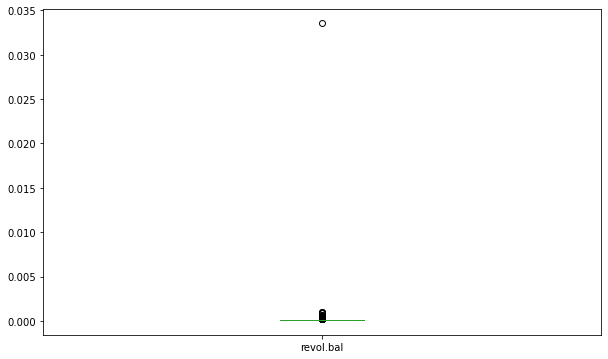

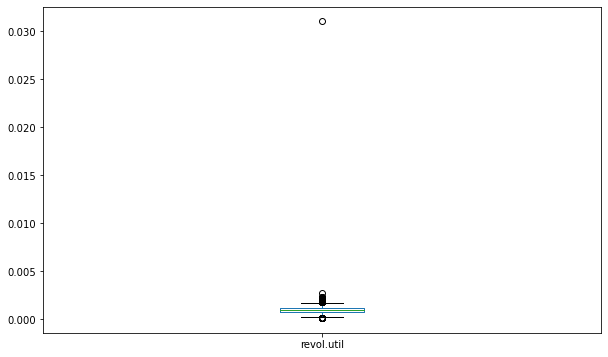

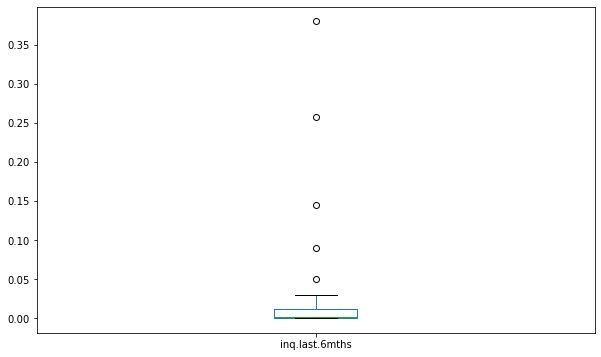

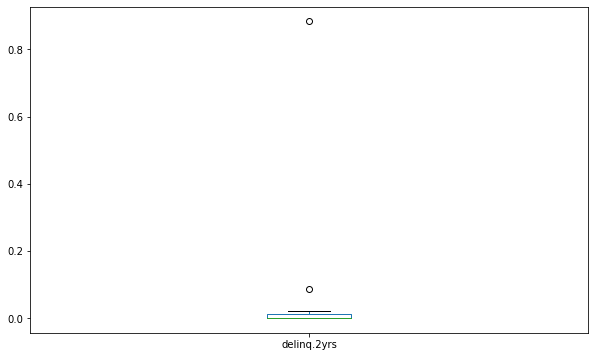

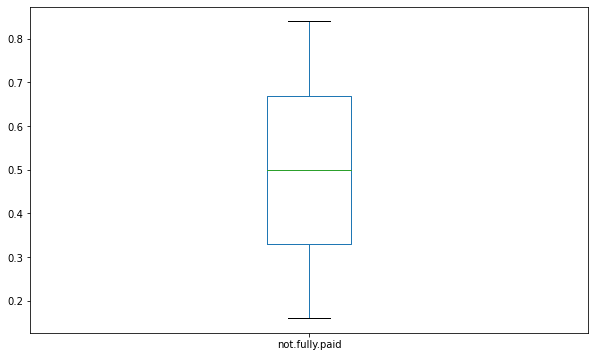

In [14]:
#for numerical variables, create bar plots by first creating bins
for n in numerical_cols:
    df[n].value_counts(normalize=True).plot.box(figsize=(10,6))
    plt.show()

'int_rate','installment','log.annual.inc','dti', 'days.with.cr.line','revol.util','inq.last.6mths','delinq.2yrs' have outliers.

### 3.b. Bi-variate analysis

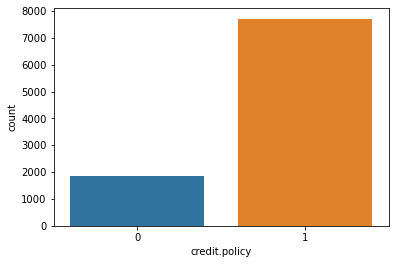

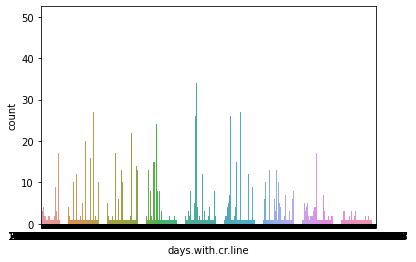

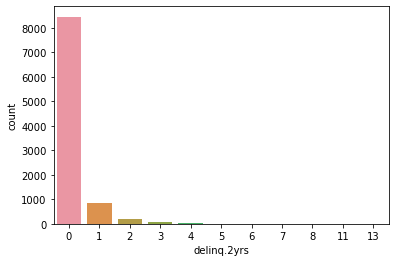

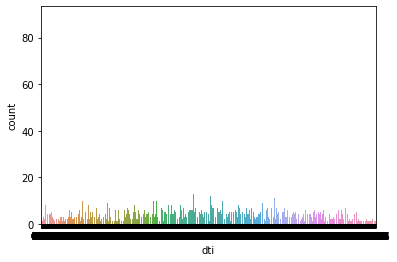

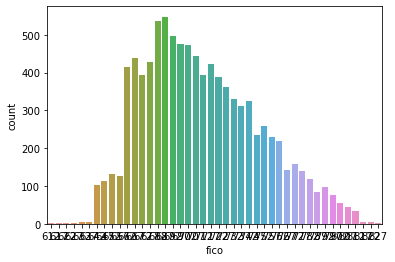

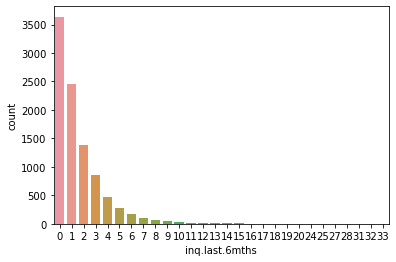

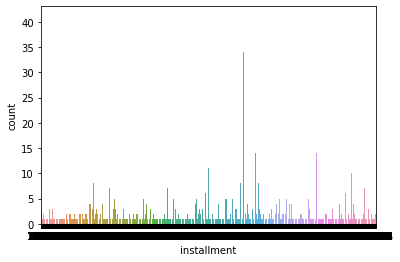

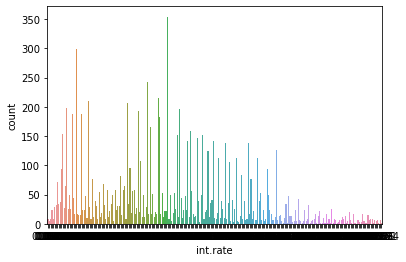

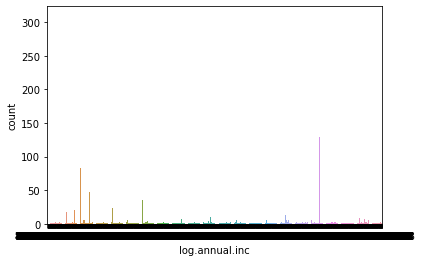

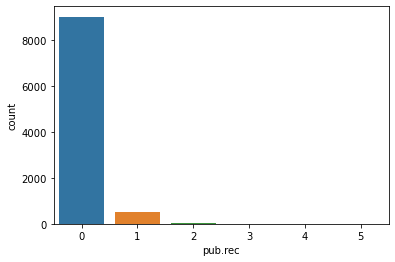

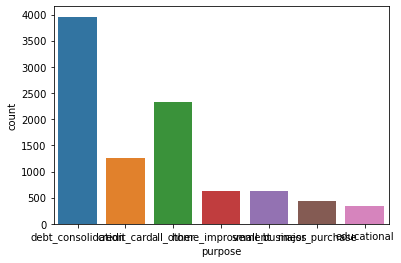

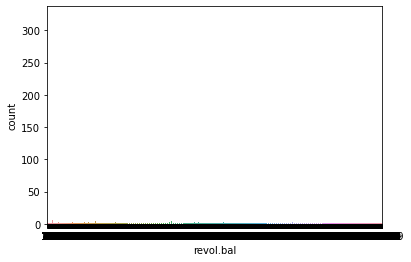

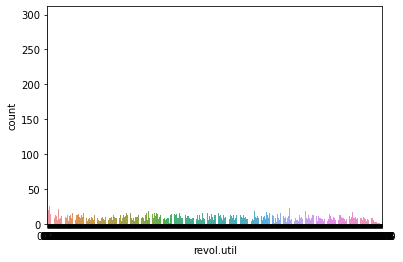

In [15]:
for i, col in enumerate(df.columns.difference(['not.fully.paid'])):
    plt.figure(i)
    sns.countplot(x=col, data=df)
    plt.show()

### 3.c Multi-collinearity analysis

In [16]:
#find a correlation between numerical variables in the dataset.
correlation_mat = df.corr()
correlation_mat

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


<AxesSubplot:>

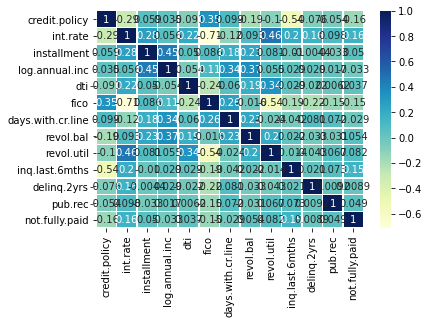

In [17]:
#visualize the data in this correlation matrix using a heat map
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

## 4. Feature Engineering 

In [18]:
#Label encoding for categorical variables
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,76,4665,1462,1887,25,1663,6606,530,0,0,0,0
1,1,1,50,2116,1143,1380,19,632,6849,778,0,0,0,0
2,1,2,115,3240,348,1115,14,1363,1628,260,1,0,0,0
3,1,2,38,1375,1462,767,20,609,6852,743,1,0,0,0
4,1,1,132,759,1410,1446,11,1132,2115,403,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,140,3111,1885,992,12,2460,7823,832,2,0,0,1
9574,0,0,89,2415,1219,16,22,1248,122,12,5,0,0,1
9575,0,2,50,687,565,1261,15,890,3879,840,8,0,0,1
9576,0,4,170,3157,811,1857,16,324,0,33,5,0,0,1


In [19]:
#independent variables
X=df.drop(['not.fully.paid'],axis=1)
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,76,4665,1462,1887,25,1663,6606,530,0,0,0
1,1,1,50,2116,1143,1380,19,632,6849,778,0,0,0
2,1,2,115,3240,348,1115,14,1363,1628,260,1,0,0
3,1,2,38,1375,1462,767,20,609,6852,743,1,0,0
4,1,1,132,759,1410,1446,11,1132,2115,403,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,140,3111,1885,992,12,2460,7823,832,2,0,0
9574,0,0,89,2415,1219,16,22,1248,122,12,5,0,0
9575,0,2,50,687,565,1261,15,890,3879,840,8,0,0
9576,0,4,170,3157,811,1857,16,324,0,33,5,0,0


In [20]:
#dependent variable 
y=df['not.fully.paid']
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

## 5. Split data into training and testing dataset

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20, random_state=42)

In [22]:
#print shape of train 
print(X_train.shape,y_train.shape)

(7662, 13) (7662,)


In [23]:
#print shape of test
print(X_test.shape,y_test.shape)

(1916, 13) (1916,)


## 6. Build Model

In [24]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#create instance of classifier with default parameters
model = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                            min_samples_leaf=4,
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=0)

#fit the model
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

In [25]:
#make predictions
y_pred_base = model.predict(X_test)

In [26]:
#Check accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_base)

0.8408141962421712

Here, y_test are the true class labels and y_pred_base are the predicted class labels in the test-set.

Also we have built the Random Forest Classifier model with default parameter of n_estimators = 100. So, we have used 100 decision-trees to build the model. 

The base accuracy score using the RandomForestClassifier is 84%

### 6.a Draw the Feature Importance Plot

Text(0, 0.5, 'FEATURE NAMES')

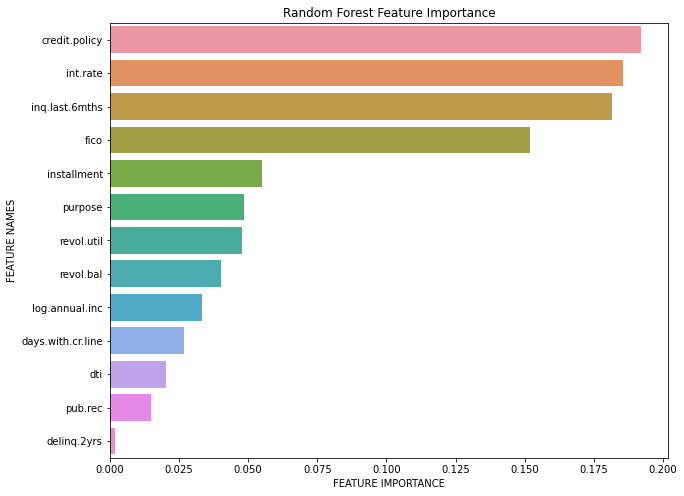

In [27]:
#create arrays from feature importance and feature names
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(X_train.columns)

#create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)
#sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

#add chart labels
plt.title('Random Forest ' + 'Feature Importance')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')


### 6.b. Visualise a single decision tree from the Random forest

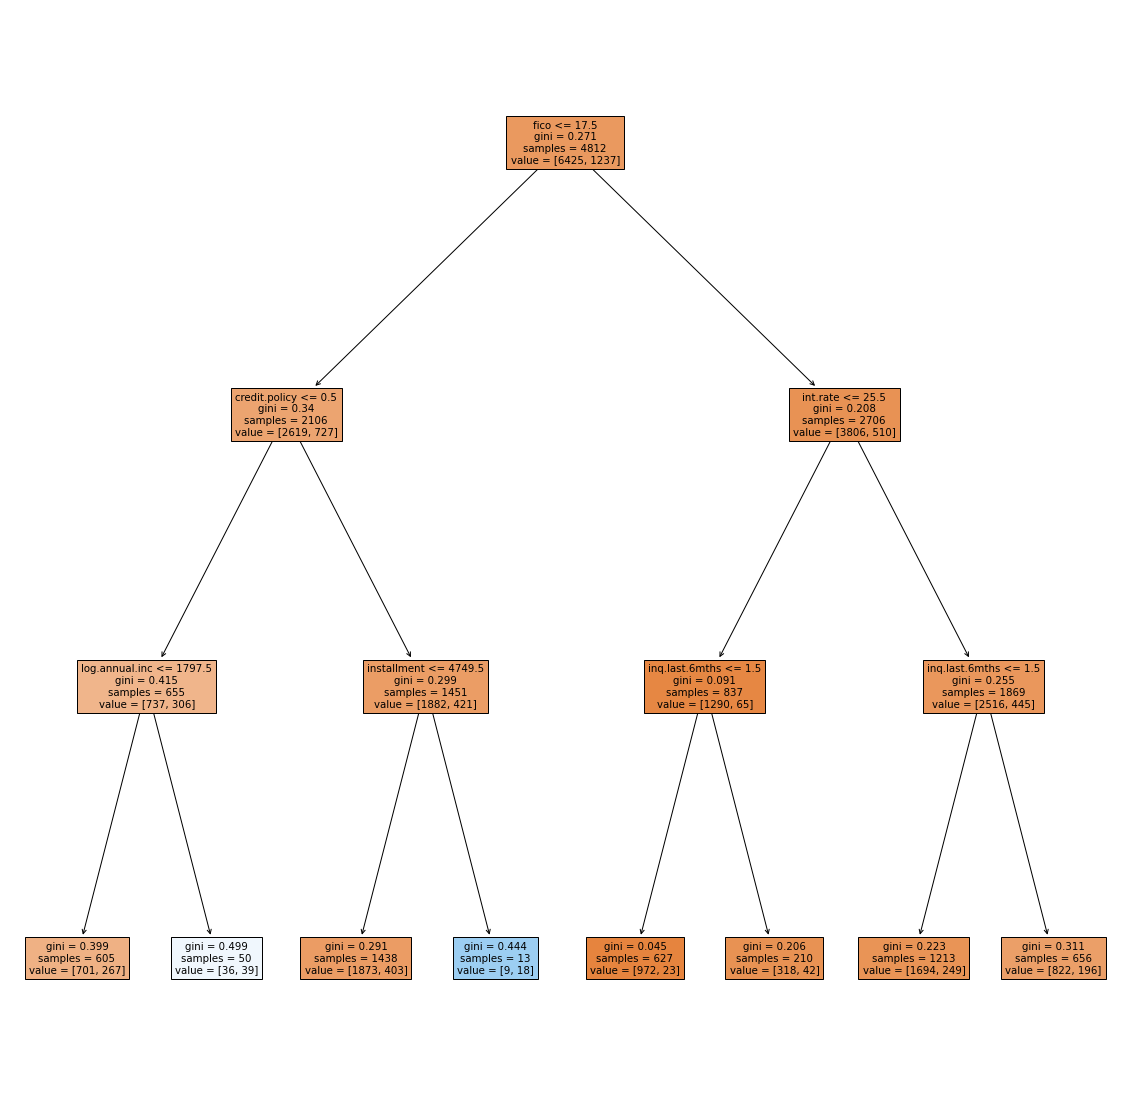

In [28]:
from sklearn import tree
#decision trees are stored in a list in the estimators_ attribute in the model.
#we can check the length of the list, which should be equal to n_estiamtors value.
len(model.estimators_)

#plot a first Decision Tree from the Random Forest (with index 0 in the list)
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=X.columns, filled=True)

## 7.Hyperparameter tuning

A hyperparameter is a parameter of the model that is set prior to the start of the learning process. Different models have different hyperparameters that can be set. For a Random Forest Classifier, there are several different hyperparameters that can be adjusted. In this post, I will be investigating the following four parameters:

Most important hyperparameters of Random Forest:

- n_estimators = n of trees
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

### Grid Search

One way to choose which hyperparameters to adjust is by conducting an exhaustive grid search or randomized search.

An exhaustive grid search takes in as many hyperparameters as you would like, and tries every single possible combination of the hyperparameters as well as as many cross-validations as you would like it to perform. An exhaustive grid search is a good way to determine the best hyperparameter values to use, but it can quickly become time consuming with every additional parameter value and cross-validation that we add.

In [29]:
forest = RandomForestClassifier(random_state = 1,
                                  n_estimators = 750,
                                  max_depth = 15, 
                                  min_samples_split = 5,  min_samples_leaf = 1) 
model = forest.fit(X_train, y_train) 
y_pred = model.predict(X_test)

In [30]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(forest,
                     param_grid, 
                     cv = 3,
                     verbose = 1, 
                     n_jobs = -1)

best = grid.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [31]:
best.best_params_

{'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300}

In [32]:
best.best_score_

0.8402505873140172

In [33]:
best.best_estimator_

RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=300,
                       random_state=1)

best_estimator_ method returns model with parameters that led to best performance which in this case is max_depth =25, min_samples_leaf=5 and n_estimators=300.

### Randomized Search

The grid search approach is often too costly, as many combinations are tested. In these cases it is easier to use a randomized search, that evaluates a only an user defined number of random combinations for each hyperparameter at every iteration. This way we could also test more hyperparameters. 

In [39]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    }

In [40]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, 
                               param_distributions = param_grid, 
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=15,
                                                    min_samples_split=5,
                                                    n_estimators=750,
                                                    random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800,

The randomised search function will search the parameters through 5 fold cross validation and 100 iterations to end up with the best parameters.

In [41]:
# best combination of parameters of random search
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

best_estimator_ method returns model with parameters that led to best performance which in this case is n_estimators =1800, min_samples_split=2,min_samples_leaf=5, max_features='sqrt', max_depth=10.

In [42]:
rf_random.best_score_

0.8398593007788616

In [43]:
# best random model 
rf_random.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=1800, random_state=1)

## 8. Conclusion

We have created a moderate classifier using the Random Forest algorithm, with a base accuracy of 84%. The hypertuning process has not done much improvement to the accuracty level, which can be a subject of further study.